# Practical Exam: Hotel Operations

LuxurStay Hotels is a major, international chain of hotels. They offer hotels for both business and leisure travellers in major cities across the world. The chain prides themselves on the level of customer service that they offer.

However, the management has been receiving complaints about slow room service in some hotel branches. As these complaints are impacting the customer satisfaction rates, it has become a serious issue. Recent data shows that customer satisfaction has dropped from the 4.5 rating that they expect.

You are working with the Head of Operations to identify possible causes and hotel branches with the worst problems.

## Data

The following schema diagram shows the tables available. You have only been provided with data where customers provided a feedback rating.

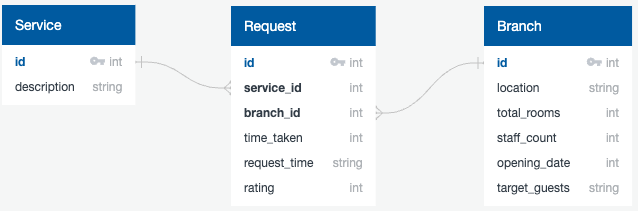


# Task 1

Before you can start any analysis, you need to confirm that the data is accurate and reflects what you expect to see.

It is known that there are some issues with the `branch` table, and the data team have provided the following data description.

Write a query to return data matching this description. You must match all column names and description criteria.

| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
|id | Nominal. The unique identifier of the hotel. </br>Missing values are not possible due to the database structure.|
| location | Nominal. The location of the particular hotel. One of four possible values, 'EMEA', 'NA', 'LATAM' and 'APAC'. </br>Missing values should be replaced with “Unknown”. |
| total_rooms | Discrete. The total number of rooms in the hotel. Must be a positive integer between 1 and 400. </br>Missing values should be replaced with the default number of rooms, 100. |
| staff_count | Discrete. The number of staff employeed in the hotel service department. </br>Missing values should be replaced with the total_rooms multiplied by 1.5. |
| opening_date | Discrete. The year in which the hotel opened. This can be any value between 2000 and 2023. </br>Missing values should be replaced with 2023. |
| target_guests | Nominal. The primary type of guest that is expected to use the hotel. Can be one of 'Leisure' or 'Business'. </br>Missing values should be replaced with 'Leisure'. |


In [ ]:
SELECT
    id,
    COALESCE(location, 'Unknown') AS location,
    CASE
        WHEN total_rooms BETWEEN 1 AND 400 THEN total_rooms
        ELSE 100
    END AS total_rooms,
    CASE
        WHEN staff_count IS NOT NULL THEN staff_count
        ELSE total_rooms * 1.5
    END AS staff_count,
    CASE
        WHEN opening_date = '-' THEN '2023'
        WHEN opening_date BETWEEN '2000' AND '2023' THEN opening_date
        ELSE '2023'
    END AS opening_date,
    CASE
        WHEN target_guests IS NULL THEN 'Leisure'
        WHEN LOWER(target_guests) LIKE 'b%' THEN 'Business'
        ELSE target_guests END AS target_guests
FROM
    public.branch;

In [ ]:
SELECT
    id,
    -- Clean location values, replace missing with 'Unknown'
    COALESCE(TRIM(location), 'Unknown') AS location,

    -- Ensure total_rooms is a positive integer between 1 and 400, replace invalid/missing with 100
    COALESCE(
        CASE
            WHEN total_rooms::int BETWEEN 1 AND 400 THEN total_rooms::int
            ELSE NULL
        END, 100) AS total_rooms,

    -- Ensure staff_count is valid, otherwise replace with total_rooms * 1.5
    COALESCE(staff_count::int, total_rooms::int * 1.5) AS staff_count,

    -- Clean and cast opening_date, ensuring it's between 2000 and 2023, replace invalid/missing with 2023
    COALESCE(
        CASE
            WHEN opening_date ~ '^[0-9]+$' AND opening_date::int BETWEEN 2000 AND 2023 THEN opening_date::int
            ELSE NULL
        END, 2023) AS opening_date,

    -- Clean target_guests, replace missing values with 'Leisure'
    COALESCE(
        CASE
            WHEN LOWER(target_guests) IN ('leisure', 'business') THEN target_guests
            ELSE NULL
        END, 'Leisure') AS target_guests

FROM
    Branch;


# Task 2

The Head of Operations wants to know whether there is a difference in time taken to respond to a customer request in each hotel. They already know that different services take different lengths of time.

Calculate the average and maximum duration for each branch and service. Your output should include the columns `service_id`, `branch_id`, `avg_time_taken` and `max_time_taken`. Values should be rounded to two decimal places where appropriate.


In [ ]:
SELECT
    service_id,
    branch_id,
    ROUND(AVG(time_taken), 2) AS avg_time_taken,
    ROUND(MAX(time_taken), 2) AS max_time_taken
FROM
    Request
GROUP BY
    service_id, branch_id;

# Task 3

The management team want to target improvements in `Meal` and `Laundry` service in Europe (`EMEA`) and Latin America (`LATAM`).

Write a query to return the `description` of the service, the `id` and `location` of the branch, the id of the request as `request_id` and the `rating` for the services and locations of interest to the management team.

Use the original branch table, not the output of task 1.

In [ ]:
SELECT
    S.description AS description,
    B.id AS id,
    B.location as location ,
    R.id AS request_id,
    R.rating as rating
FROM
    Request R
JOIN
    Service S ON R.service_id = S.id
JOIN
    Branch B ON R.branch_id = B.id
WHERE
    B.location IN ('EMEA', 'LATAM')
    AND S.description IN ('Meal', 'Laundry');

# Task 4

So that you can take a more detailed look at the lowest performing hotels, you want to get service and branch information where the average rating for the branch and service combination is lower than 4.5 - the target set by management.  

Your query should return the `service_id` and `branch_id`, and the average rating (`avg_rating`), rounded to 2 decimal places.

In [ ]:
SELECT
    service_id,
    branch_id,
    ROUND(AVG(rating), 2) AS avg_rating
FROM
    Request
GROUP BY
    service_id, branch_id
HAVING
    AVG(rating) < 4.5;